In [60]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

pd.set_option('display.max_colwidth', 50)
plt.style.use(['seaborn-whitegrid', 'seaborn-poster'])

In [ ]:
# Run this line to install the SpaCy English language model.
!python -m spacy download en_core_web_sm

First we load some raw post data from a CSV file.

In [47]:
posts_file = '../src/reddit_raw_with_labels.csv'
df_posts = pd.read_csv(posts_file)
df_posts['created_at'] = pd.to_datetime(df_posts['created_at'])

In [48]:
df_posts['label'] = df_posts['majority_vote']
df_posts['label'] = df_posts['label'].fillna(df_posts['category_sl'])
df_posts['label'] = df_posts['label'].astype('category')
df_posts = df_posts.drop(columns=['majority_vote', 'category_sl'])

## Exploratory Data Analysis

Exploratory data analysis is commonly the first step when starting a data science project, It give a better understanding of the data and helps to identify any issues that might otherwise be missed (for example missing data, inconsistent column values etc.).

In [49]:
df_posts.head()

,title,score,num_comments,created_at,body,label
0,Live conversation via phone,3,2,2020-08-27 16:26:00,Hi guys I m quite confused. So i started this ...,live convo
1,What's a test with the most steps you've ever ...,6,9,2020-08-27 11:19:00,"I got one with 57 steps a while back, and just...",bad test
2,Preparing for Live Conversation,1,4,2020-08-27 10:44:00,Hi! Iâ€™ve been scheduled for a Live Test on A...,live convo
3,Mobile Test,0,8,2020-08-27 06:50:00,Hey yâ€™all...Iâ€™m about to take a test on my...,mobile
4,Curious about message,1,7,2020-08-27 06:49:00,&#x200B; [Anyone know what this is?](https://p...,other


In [50]:
for i, row in df_posts[~df_posts['label'].isnull()].sample(n=5, random_state=100).iterrows():
    print('-------------------------')
    print(row['title'])
    print()
    print(row['body'])
    print()
    print(row['label'])
    print()

-------------------------
What is the right answer for your cellphone provider?!

So I always answer the screeners honestly and every single time in the last 4-5 months I have answered AT&T it screens me out. Just dying to know what the "right" answer is because I'm too honest to try all the other options to actually find out.

screeners

-------------------------
Multiple tests have failed to upload in recent weeks

In the past 3 weeks I have had 3 completed tests fail to upload no matter what I try. Support has not replied to me at all and I haven't been paid for the 3. I don't know what else to try. I've completed around 30 other tests that uploaded successfully in that time span so I know it's not on my end.

recorder

-------------------------
Unpaid recruitment test through regular test recorder

I've never seen this before. I accepted a test, and it wanted me to fill out a recruitment survey for future tests. I filled it out, then submitted it as usual, figured it would just be 

Look at the temporal distribution (when were these posts written? How many per week?)

Text(0, 0.5, '#\xa0of posts (weekly)')

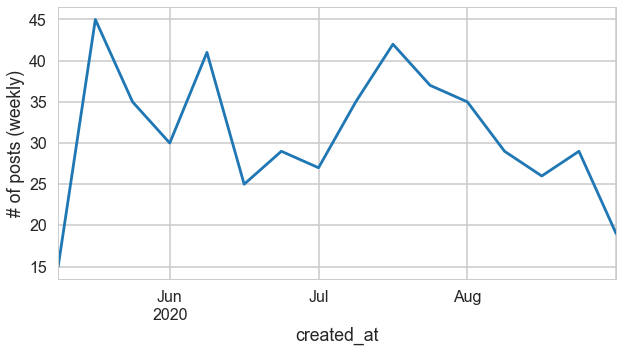

In [51]:
ax = df_posts.set_index('created_at').resample('W').size().plot(figsize=(10, 5))
ax.set_ylabel('# of posts (weekly)')

Look at the labels and their prevalence

Text(0, 0.5, '# of posts')

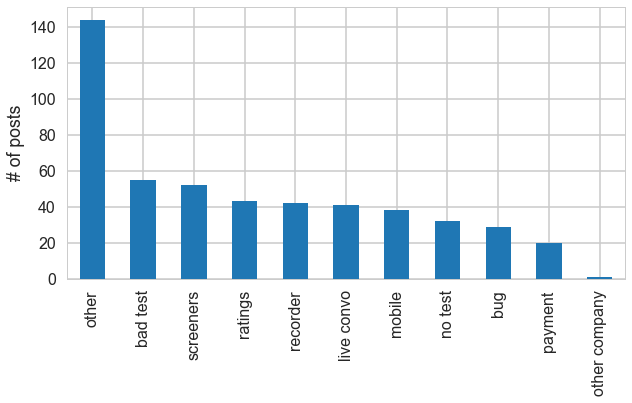

In [52]:
ax = df_posts['label'].value_counts().plot(kind='bar', figsize=(10, 5))
ax.set_ylabel('# of posts')

## Data Preprocessing

The goal of preprocessing is to get raw text data into a form that we can use to train a machine learning model. In this example we are using a very commonly used approach know as a Bag of Words (BoW). The model is quite simple and doesn't take account of the order that words appear in, only whether they appear in the post or not.

Text data is cleaned of superfluous information - for example punctuation and commonly used words know as 'stop words'. 

Text is also normalized in order to reduce the size of the effective vocabulary - e.g. by converting it to lower cases so that e.g. 'Live Conversation' and 'live conversation' are treated in the same way. 

Note that the value of some preprocessing step is highly dependent on the particular task and source of text, but many of the steps used here are commonly used in many applications with good results.

In [54]:
raw_text = """
I like painting so I was running down the road to buy some more paints. 
Unfortunately the shop was closed when I arrived!!??!"
"""
print(raw_text)


I like painting so I was running down the road to buy some more paints. 
Unfortunately the shop was closed when I arrived!!??!"



### Convert to lower (normalize)

In [62]:
raw_text_lower = raw_text.lower()
print(raw_text_lower)


i like painting so i was running down the road to buy some more paints. 
unfortunately the shop was closed when i arrived!!??!"



### Remove punctuation

In [61]:
PUNCT_TO_REMOVE = string.punctuation.replace('$', '')
print(PUNCT_TO_REMOVE)

!"#%&'()*+,-./:;<=>?@[\]^_`{|}~


In [63]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

raw_text_lower_np = remove_punctuation(raw_text_lower)
print(raw_text_lower_np)


i like painting so i was running down the road to buy some more paints 
unfortunately the shop was closed when i arrived

